In [1]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

In [2]:
houses_data= pd.read_csv('king_ country_ houses_aa.csv')
houses_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


id: A unique identifier for a house.
    
date: The date on which the house was sold.
    
price: The sale price of the house (prediction target).
    
bedrooms: Number of bedrooms in the house.
    
bathrooms: Number of bathrooms in the house, per bedroom.
    
sqft_living: Square footage of the interior living space.
    
sqft_lot: Square footage of the land space.
    
floors: Number of floors (levels) in the house.
    
waterfront: Whether the house has a waterfront view.
    
view: Number of times the house has been viewed.
    
condition: The overall condition of the house.
    
grade: The overall grade given to the house, based on the King County grading system.
    
sqft_above: Square footage of the house apart from the basement.
    
sqft_basement: Square footage of the basement.
    
yr_built: The year the house was built.
    
yr_renovated: The year the house was renovated.
    
zipcode: ZIP code area.
    
lat: Latitude coordinate.
    
long: Longitude coordinate.
    
sqft_living15: The interior living space for the nearest 15 neighbors in 2015.
    
sqft_lot15: The land spaces for the nearest 15 neighbors in 2015.
    
TARGET --> Price: Our primary focus is to understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.

In [3]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
houses_data.shape

(21613, 21)

In [5]:
houses_data.nunique().sort_values(ascending=False)

id               21436
sqft_lot          9782
sqft_lot15        8689
lat               5034
price             4028
sqft_living       1038
sqft_above         946
sqft_living15      777
long               752
date               372
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           30
bedrooms            13
grade               12
floors               6
view                 5
condition            5
waterfront           2
dtype: int64

<h2 style="color: #FF8C00;"> Data cleaning </h2>

In [6]:
houses_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
houses_data.duplicated().sum()

0

In [8]:
houses_data.eq(" ").sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
houses_data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

Here, we will copy the first data to not loose it , and from now we will make changes on ` king_data `:

In [10]:
king_data=houses_data.copy()
king_data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6733,9284802045,20140630T000000,345000.0,2,1.00,970,5750,1.0,0,0,4,6,970,0,1932,0,98126,47.5518,-122.370,1650,8625
210,2310030510,20150422T000000,320000.0,4,2.25,1550,7579,2.0,0,0,3,8,1550,0,1993,0,98038,47.3540,-122.047,1630,6397
3612,4137000590,20140717T000000,322500.0,4,2.25,2140,9377,2.0,0,0,4,8,2140,0,1986,0,98092,47.2649,-122.218,2030,7846
11849,1072000400,20141023T000000,385000.0,4,3.00,2120,13000,2.0,0,0,4,8,2120,0,1978,0,98059,47.4745,-122.141,2180,11440
14539,9266700175,20150327T000000,415000.0,2,1.00,880,5100,1.0,0,0,4,7,880,0,1941,0,98103,47.6940,-122.346,980,5100


In [11]:
king_data.date.value_counts()

date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: count, Length: 372, dtype: int64

In [12]:
# cleaning the date column:
king_data['date']=king_data['date'].apply(lambda x: x.split('T')[0]) #changing date format

In [13]:
king_data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12440,2624049035,20140617,560000.0,3,2.00,2340,3477,1.0,0,1,5,7,1170,1170,1971,0,98118,47.5400,-122.267,2110,6300
8925,2114700540,20141021,366000.0,3,2.50,1320,4320,1.0,0,0,3,6,660,660,1918,0,98106,47.5327,-122.347,1190,4200
7269,4139470010,20141006,1615000.0,4,3.25,4250,12281,2.0,0,4,3,12,3020,1230,1996,0,98006,47.5507,-122.113,4940,12941
7601,3288301050,20140819,482000.0,4,2.75,3010,15750,1.0,0,0,4,8,1560,1450,1973,0,98034,47.7336,-122.183,2110,9450
5891,8944320470,20140623,345950.0,3,2.50,2110,4118,2.0,0,0,3,8,2110,0,1989,0,98042,47.3878,-122.153,2110,4044


In [14]:
king_data['date']=king_data['date'].astype(int) #date to integer

In [15]:
king_data.dtypes

id                 int64
date               int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [16]:
king_data.set_index('id', inplace = True)
king_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [17]:
#we will create a bolean column for renovated houses and drop the yr_renovated:
king_data.yr_renovated.value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [18]:
king_data['renovated']=king_data['yr_renovated'].apply(lambda x:0 if x==0 else 1)

In [19]:
king_data.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
id,,,,,,,,,,,,,,,,,,,,,
7129300520,20141013,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0


In [20]:
king_data.renovated.value_counts()

renovated
0    20699
1      914
Name: count, dtype: int64

In [21]:
king_data.drop(columns=['yr_renovated'], inplace=True)

In [22]:
king_data.grade.value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

according to me we can drop the column ` grade` , this column is the overall grade given to the house, based on the King County grading system, so we will not need it in our future steps.

In [23]:
king_data.drop(columns=['grade'], inplace=True)

In [24]:
king_data.sample(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
id,,,,,,,,,,,,,,,,,,,
7203220050,20141118,988830.0,5,3.25,4115,7910,2.0,0,0,3,4115,0,2014,98053,47.6847,-122.016,3950,6765,0
1727500230,20141119,415000.0,3,1.75,1640,6435,1.0,0,0,3,1190,450,1972,98034,47.7197,-122.217,1770,6930,0


In [25]:
king_data.view.value_counts() # we will create a bolean column for viewd houses and we will drop view:

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [26]:
king_data['viewed']=king_data['view'].apply(lambda x:0 if x==0 else 1)

In [27]:
king_data.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,viewed
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013,221900.0,3,1.0,1180,5650,1.0,0,0,3,1180,0,1955,98178,47.5112,-122.257,1340,5650,0,0


In [28]:
king_data.viewed.value_counts()

viewed
0    19489
1     2124
Name: count, dtype: int64

In [29]:
king_data.drop(columns=['view'], inplace=True)

In [30]:
king_data.sample(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,viewed
id,,,,,,,,,,,,,,,,,,,
3279000370,20150202,279000.0,3,2.50,1500,7350,1.0,0,2,1060,440,1979,98023,47.3025,-122.382,1390,7770,0,0
2525000510,20141106,328000.0,3,1.75,1470,7650,1.0,0,3,1130,340,1983,98059,47.4818,-122.161,1590,7500,0,0


In [92]:
king_data.waterfront.value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [31]:
# We will use these codes to move the price columns to the end (for ML)
target = king_data.pop("price")
king_data["price"] = target
king_data.sample(2)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,viewed,price
id,,,,,,,,,,,,,,,,,,,
1079600270,20150306,3,1.75,1840,17286,1.0,0,4,1440,400,1978,98030,47.3710,-122.173,1840,14541,0,0,325000.0
5611500100,20140522,4,2.50,2860,12394,2.0,0,3,2860,0,1999,98075,47.5832,-122.026,3070,8515,0,0,655000.0


<h2 style="color: #FF8C00;"> Data description: </h2>

In [32]:
king_data.describe().T

,count,mean,std,min,25%,50%,75%,max
date,21613.0,2.014390e+07,4436.582469,2.014050e+07,2.014072e+07,2.014102e+07,2.015022e+07,2.015053e+07
bedrooms,21613.0,3.370842e+00,0.930062,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,0.770163,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,918.440897,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,41420.511515,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,0.539989,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,0.086517,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
condition,21613.0,3.409430e+00,0.650743,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
sqft_above,21613.0,1.788391e+03,828.090978,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
sqft_basement,21613.0,2.915090e+02,442.575043,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03


<h2 style="color: #FF8C00;"> Checking Distributions: </h2>

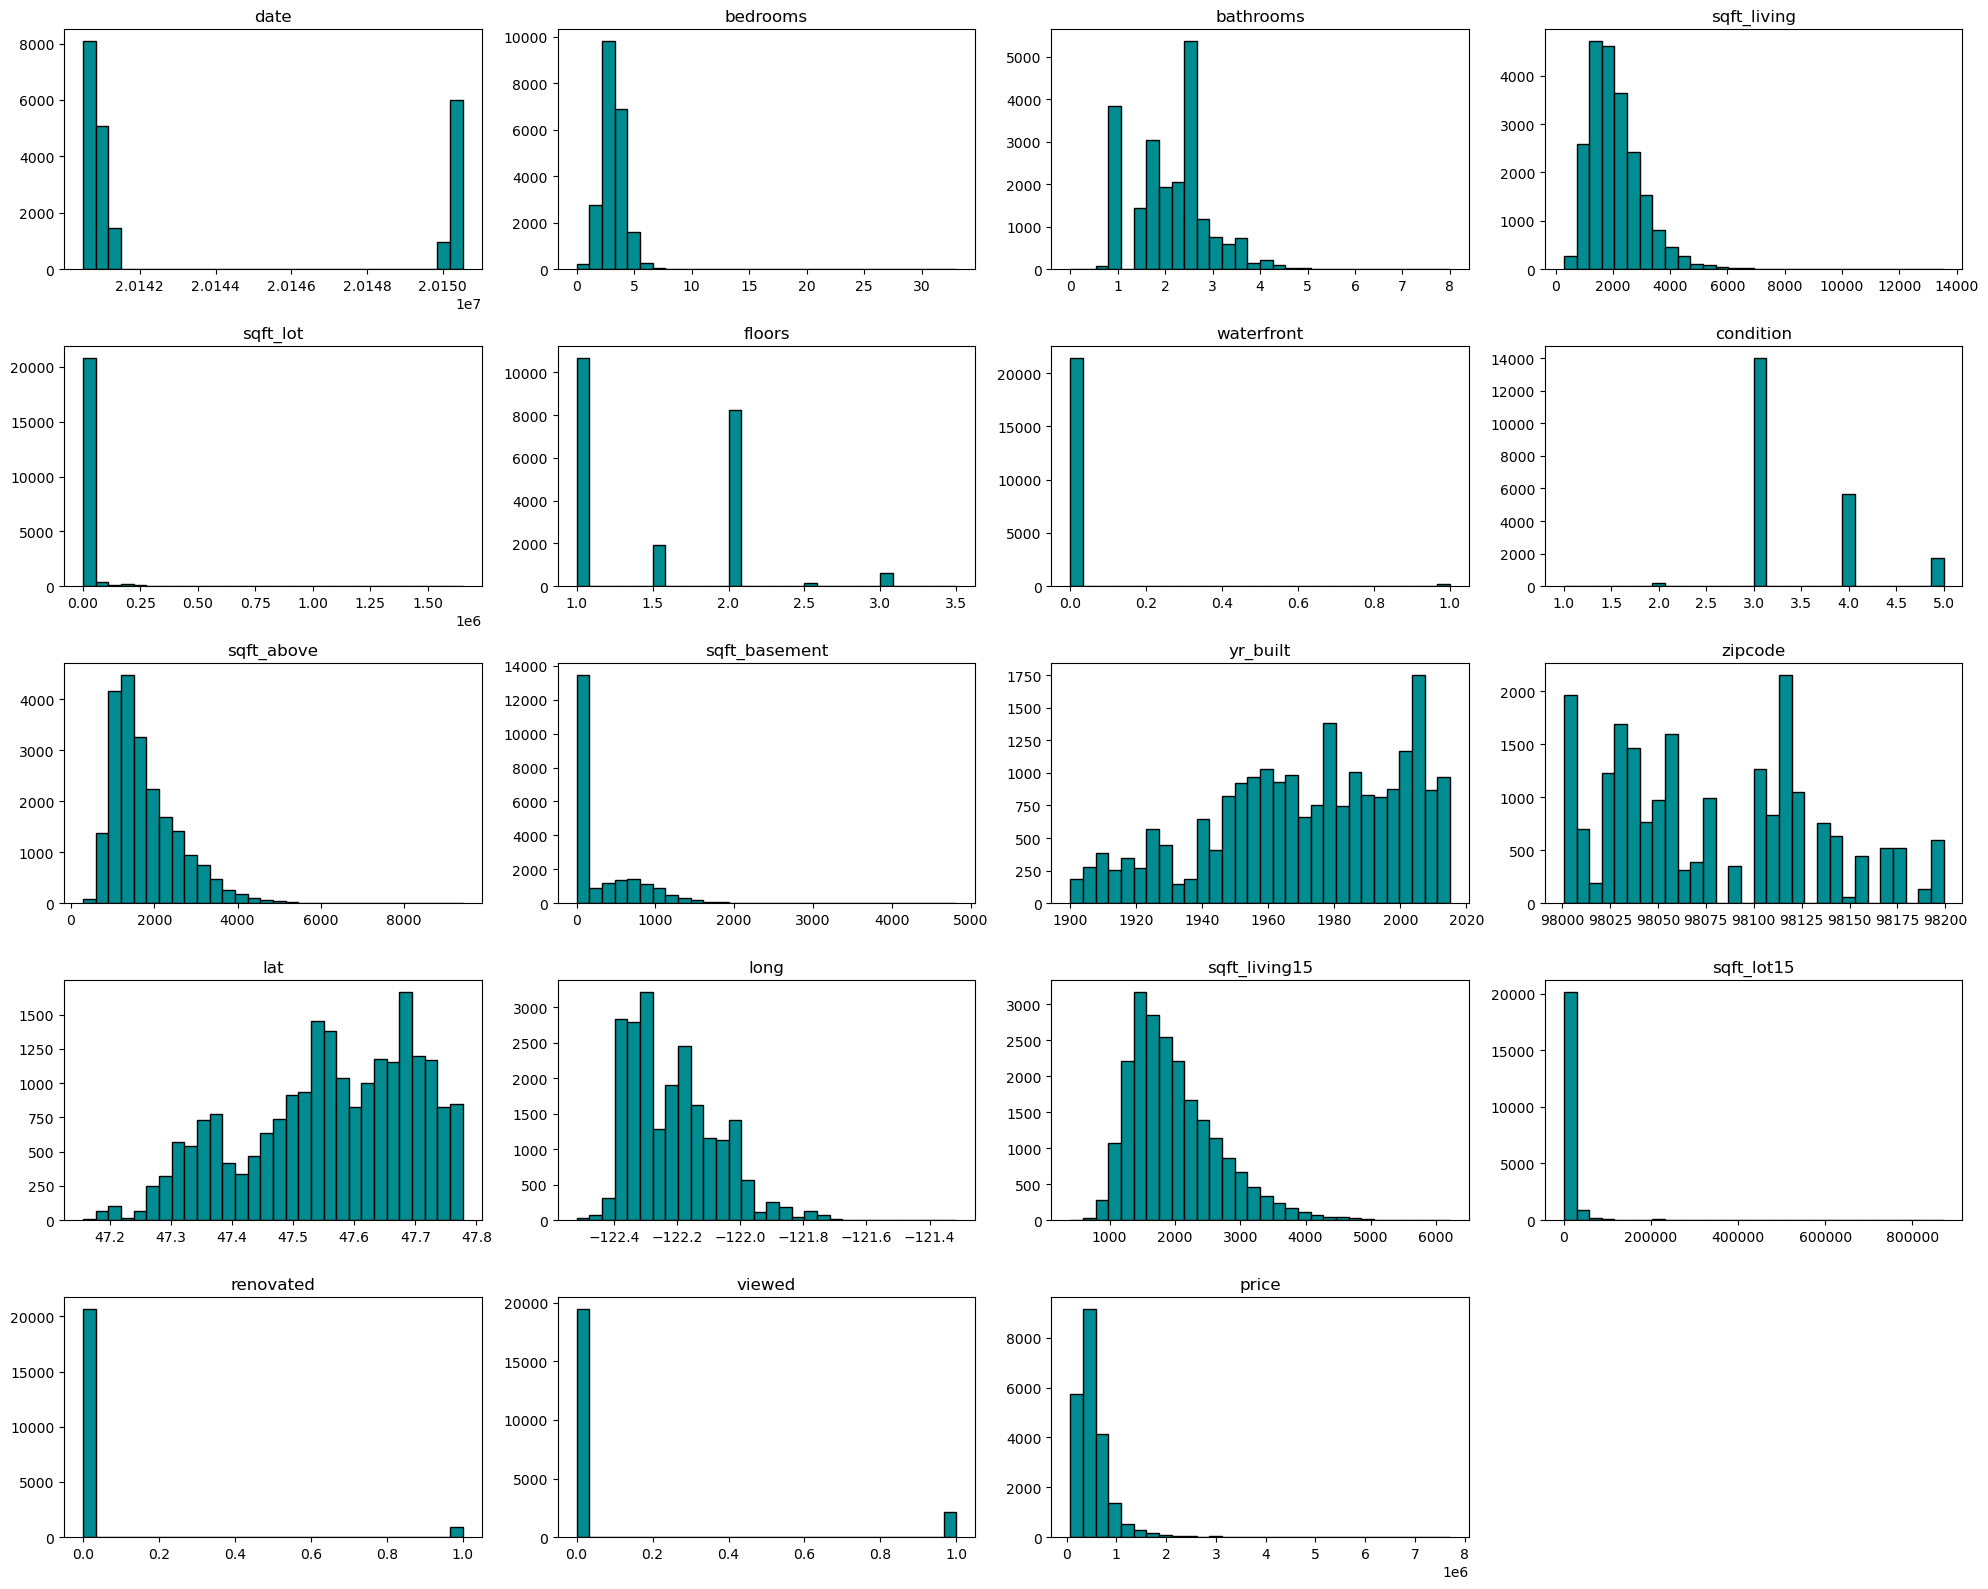

In [33]:
color = '#008C90'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(king_data.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(king_data.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(king_data.columns[i])

plt.tight_layout()
plt.show()

<h2 style="color: #FF8C00;"> Checking Outliers: </h2>

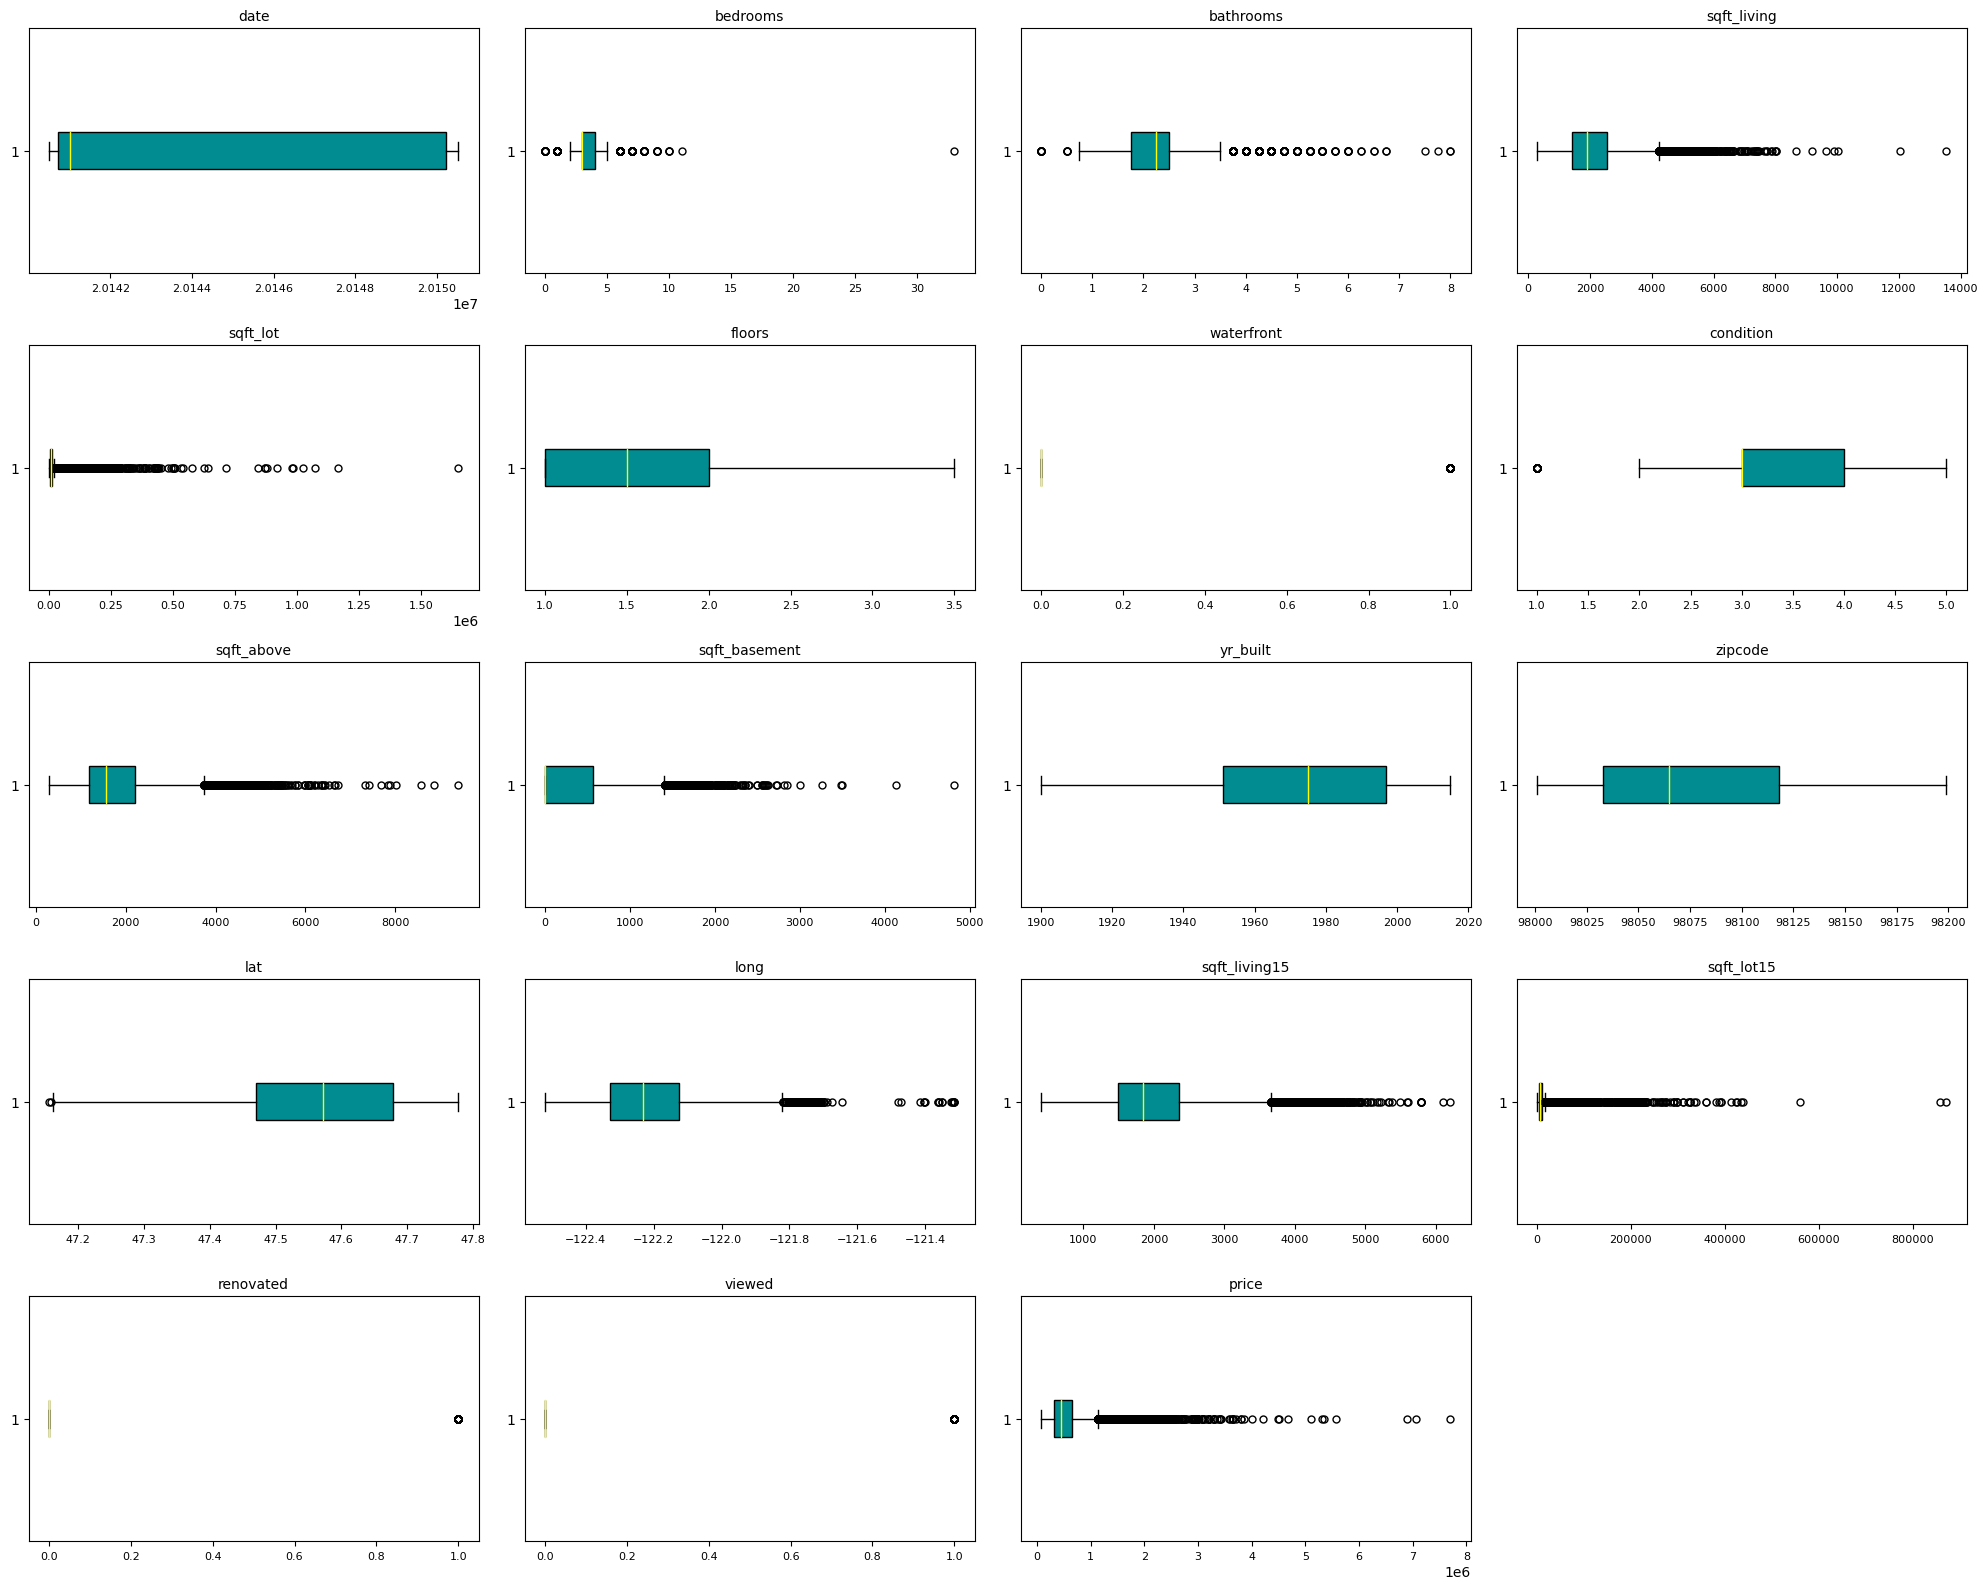

In [34]:
color = '#008C90'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(king_data.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(king_data.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(king_data.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h2 style="color: #FF8C00;"> Price distribution: </h2>

We check here our ` target distribution: `

<Axes: xlabel='price', ylabel='Count'>

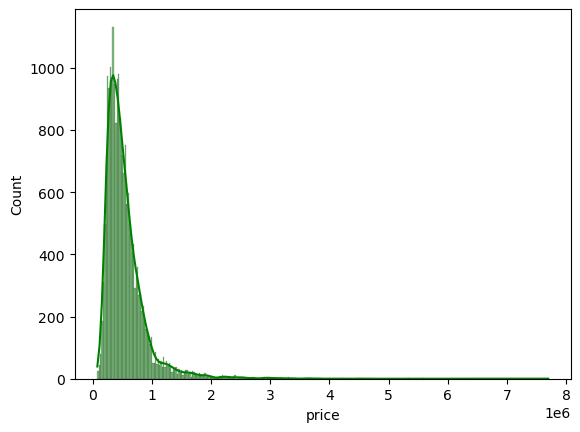

In [35]:
sns.histplot(king_data["price"], color="green", kde=True)

<h2 style="color: #FF8C00;"> Looking for correlation: </h2>

#### <h2 style="color: #FF8C00;"> Correlation Matrix-Heatmap Plot

In [36]:
num=king_data.select_dtypes(include="number")
num

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,viewed,price
id,,,,,,,,,,,,,,,,,,,
7129300520,20141013,3,1.00,1180,5650,1.0,0,3,1180,0,1955,98178,47.5112,-122.257,1340,5650,0,0,221900.0
6414100192,20141209,3,2.25,2570,7242,2.0,0,3,2170,400,1951,98125,47.7210,-122.319,1690,7639,1,0,538000.0
5631500400,20150225,2,1.00,770,10000,1.0,0,3,770,0,1933,98028,47.7379,-122.233,2720,8062,0,0,180000.0
2487200875,20141209,4,3.00,1960,5000,1.0,0,5,1050,910,1965,98136,47.5208,-122.393,1360,5000,0,0,604000.0
1954400510,20150218,3,2.00,1680,8080,1.0,0,3,1680,0,1987,98074,47.6168,-122.045,1800,7503,0,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521,3,2.50,1530,1131,3.0,0,3,1530,0,2009,98103,47.6993,-122.346,1530,1509,0,0,360000.0
6600060120,20150223,4,2.50,2310,5813,2.0,0,3,2310,0,2014,98146,47.5107,-122.362,1830,7200,0,0,400000.0
1523300141,20140623,2,0.75,1020,1350,2.0,0,3,1020,0,2009,98144,47.5944,-122.299,1020,2007,0,0,402101.0


In [37]:
num_corr = num.corr().round(2)

In [38]:
num.corrwith(num['price']).round(2).sort_values(ascending=False)

price            1.00
sqft_living      0.70
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
viewed           0.36
sqft_basement    0.32
bedrooms         0.31
lat              0.31
waterfront       0.27
floors           0.26
renovated        0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
date             0.00
zipcode         -0.05
dtype: float64

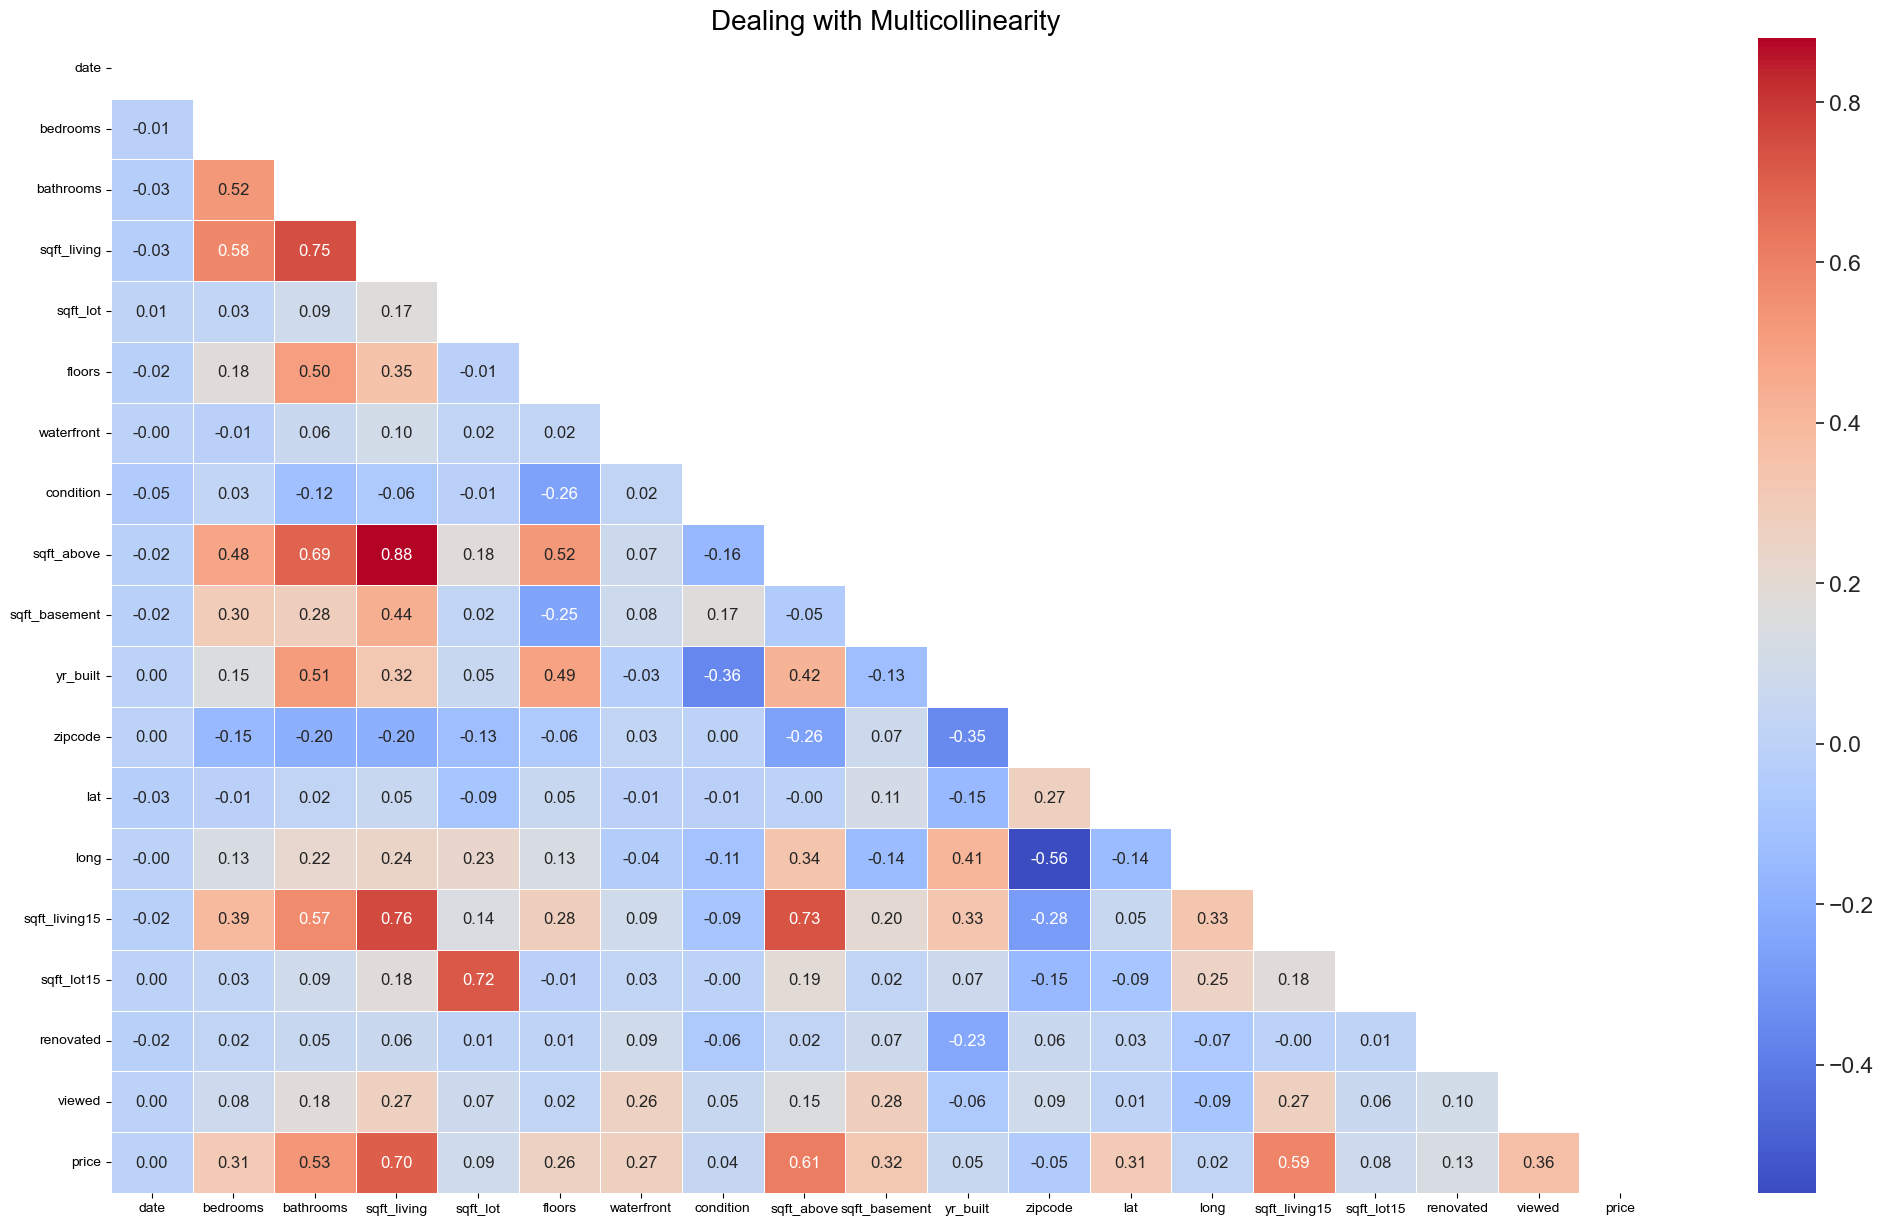

In [39]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

It is not necessary but we can also drop ` sqft_above `

In [40]:
king_data.drop(columns=['sqft_above'], inplace= True)

In [41]:
king_data.head(1)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,viewed,price
id,,,,,,,,,,,,,,,,,,
7129300520,20141013,3,1.0,1180,5650,1.0,0,3,0,1955,98178,47.5112,-122.257,1340,5650,0,0,221900.0


<h1 style="color: #FF8C00;">04 | Data Preprocessing </h1>

<h2 style="color: #FF8C00;">X-y Split</h2>

In [42]:
X = king_data.drop('price', axis=1)
y = king_data['price']

#### <h2 style="color: #FF8C00;"> Modeling

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
print(f'100% of our data: {len(king_data)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


<h2 style="color: #FF8C00;">Selecting the Model: Linear Regression</h2>

In [45]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

<h2 style="color: #FF8C00;">Model Validation</h2>

In [46]:
# Make predictions on the test dataset
predictions= model.predict(X_test)
predictions

array([ 442192.22151481,  766562.91105933, 1149133.0311531 , ...,
        334385.49150637,  672689.12188934,  582422.95434719])

In [47]:
# Make a dataframe to compare
comparison = pd.DataFrame({'actual':y_test,'pred':predictions})
comparison


,actual,pred
id,,
2591820310,365000.0,4.421922e+05
7974200820,865000.0,7.665629e+05
7701450110,1038000.0,1.149133e+06
9522300010,1490000.0,1.609229e+06
9510861140,711000.0,6.826676e+05
...,...,...
1402660150,412000.0,5.208363e+05
2301400325,760000.0,6.725690e+05
6150200005,410500.0,3.343855e+05


In [48]:
comparison['dif']=abs(comparison['actual']-comparison['pred'])
comparison.head()

,actual,pred,dif
id,,,
2591820310,365000.0,4.421922e+05,77192.221515
7974200820,865000.0,7.665629e+05,98437.088941
7701450110,1038000.0,1.149133e+06,111133.031153
9522300010,1490000.0,1.609229e+06,119229.218240
9510861140,711000.0,6.826676e+05,28332.410629


<h2 style="color: #FF8C00;">Metrics</h2>

In [49]:
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [50]:
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.672
RMSE =  217594.2019
MSE =   47347236713.8541
MAE =  135496.6593


Value: 0.672 means that 67.2% of the variance in the dependent variable is explained by the model. Though there is still 32.8% of the variance unexplained by the model, indicating room for improvement or the presence of other influencing factors not included in the model.

We will try other models.

<h1 style="color: #FF8C00;"> Improving the Model</h1>

<h2 style="color: #FF8C00;">Selecting the Model: Ridge Regression</h2>

In [51]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [52]:
predictions_ridge = ridge.predict(X_test)

In [53]:
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

In [54]:
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.6719
RMSE =  217636.0942
The value of the metric MSE is  47365469482.8618
MAE =  135490.4586


<h2 style="color: #FF8C00;">Selecting the Model: Lasso Regression</h2>

In [55]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [56]:
predictions_lasso = lasso.predict(X_test)

In [57]:
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

In [58]:
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("The value of the metric MSE is ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.672
RMSE =  217595.3353
The value of the metric MSE is  47347729963.2404
MAE =  135496.2199


<h2 style="color: #FF8C00;">Selecting the Model: Decision Tree Regression</h2>

In [59]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
predictions_tree = tree.predict(X_test)

In [61]:
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

In [62]:
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.7094
RMSE =  204812.2343
The value of the metric MSE is  41948051319.9041
MAE =  106598.8908


<h2 style="color: #FF8C00;">Selecting the Model: KNN Regression</h2>

In [63]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [64]:
predictions_knn = knn.predict(X_test)

In [65]:
r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_3_5 = mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)

In [66]:
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("The value of the metric MSE is ", round(MSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.4671
RMSE =  277376.1004
The value of the metric MSE is  76937501051.2747
MAE =  168727.0567


<h2 style="color: #FF8C00;">Selecting the Model: XGBoost Regression</h2>

In [67]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [68]:
predictions_xgb = xgbr.predict(X_test)

In [69]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

In [70]:
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7589
RMSE =  186554.3683
The value of the metric MSE is  34802532334.8947
MAE =  101936.1472


<h2 style="color: #FF8C00;">Comparison</h2>

In [71]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6],
    'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6],
    'MSE': [MSE_3, MSE_3_2, MSE_3_3, MSE_3_4, MSE_3_5, MSE_3_6],
    'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6]
}

In [72]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,6.720345e-01,6.719082e-01,6.720311e-01,7.094337e-01,4.670683e-01,7.589294e-01
RMSE,2.175942e+05,2.176361e+05,2.175953e+05,2.048122e+05,2.773761e+05,1.865544e+05
MSE,4.734724e+10,4.736547e+10,4.734773e+10,4.194805e+10,7.693750e+10,3.480253e+10
MAE,1.354967e+05,1.354905e+05,1.354962e+05,1.065989e+05,1.687271e+05,1.019361e+05


<h2 style="color: #FF8C00;">Normalization with MinMaxScaler</h2>

In [74]:
scaler = MinMaxScaler()

In [75]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [77]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

In [78]:
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 7))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8401
RMSE =  151926.2939
The value of the metric MSE is  23081598781.960094
MAE =  76170.1539


These are the best results we got.

<h2 style="color: #FF8C00;">Normalization with StandardScaler</h2>

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [82]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

In [83]:
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8401
RMSE =  151926.2939
The value of the metric MSE is  23081598781.9601
MAE =  76170.1539


<h2 style="color: #FF8C00;">Try it with dealing with outliers</h2>

In [84]:
def outlier_slayer(king_data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = king_data[column].quantile(0.25)
        Q3 = king_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = king_data[(king_data[column] >= lower_bound) & (king_data[column] <= upper_bound)]
    return data

<h1 style="color: #FF8C00;">07 | Reporting</h1>

In [85]:
comparison

,actual,pred,dif
id,,,
2591820310,365000.0,4.421922e+05,77192.221515
7974200820,865000.0,7.665629e+05,98437.088941
7701450110,1038000.0,1.149133e+06,111133.031153
9522300010,1490000.0,1.609229e+06,119229.218240
9510861140,711000.0,6.826676e+05,28332.410629
...,...,...,...
1402660150,412000.0,5.208363e+05,108836.289952
2301400325,760000.0,6.725690e+05,87431.045915
6150200005,410500.0,3.343855e+05,76114.508494


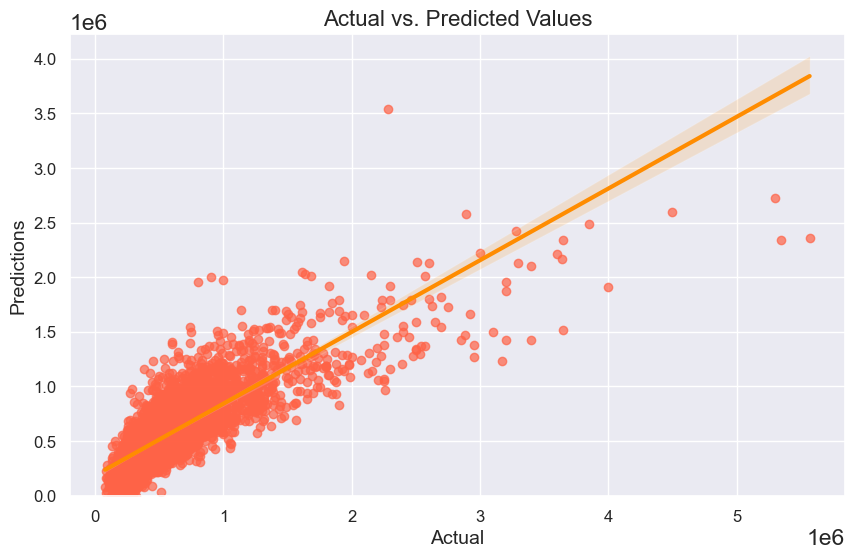

In [86]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=comparison,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()